# Model simulation and sanity check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
from agent import run_experiment, Bandit, Agent
bandit = Bandit()

# Rescorla Wagner

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0}


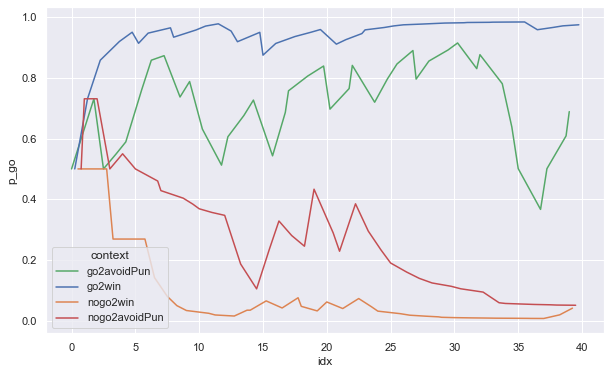

In [5]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [6]:
from fitting import ML

max_likelihood = ML(df, optimization_method='Nelder-Mead', model_type='RW')

res = max_likelihood.fit_model()
res

/Users/sepsad/Desktop/Stuffs/Research/goNoGo/Modelling/modelling_gng/fitting.py:80: OptimizeWarning: Initial guess is not within the specified bounds
  res = minimize(self.neg_log_likelihood, x0,


 final_simplex: (array([[0.21312659, 5.02541817],
       [0.21312455, 5.02551381],
       [0.21311548, 5.02549647]]), array([57.30254265, 57.30254265, 57.30254265]))
           fun: 57.302542645473025
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 72
        status: 0
       success: True
             x: array([0.21312659, 5.02541817])

# Rescorla Wegner + Noise

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 3, 'noise': 0.3, 'bias': 0, 'Pav': 0}


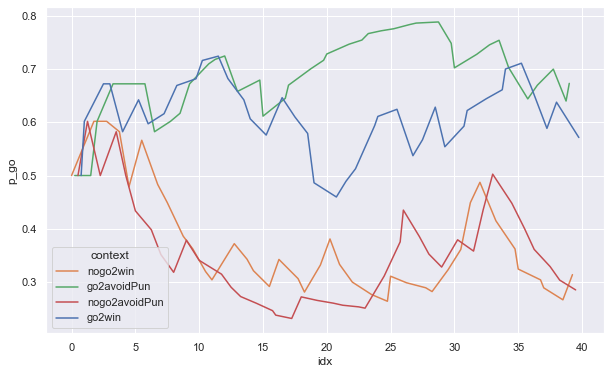

In [17]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 3, 'noise': 0.3, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)


In [18]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise')

max_likelihood.fit_model()

      fun: 106.2006898882261
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.21831442e-03, -4.68958208e-05,  1.24325084e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 80
      nit: 10
     njev: 20
   status: 0
  success: True
        x: array([0.16559703, 1.46662989, 0.        ])

# Rescorla Wegner + Noise + Go Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 2, 'noise': 0.2, 'bias': 1, 'Pav': 0}


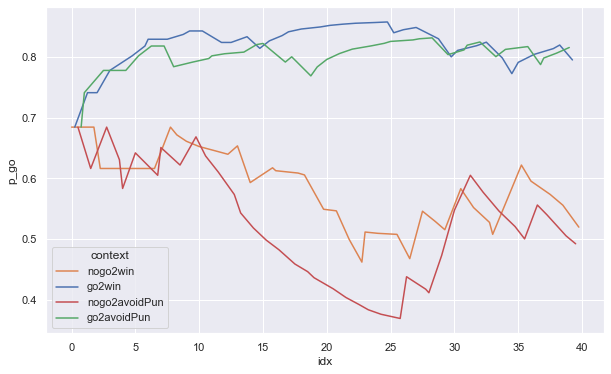

In [24]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 2, 'noise': 0.2, 'bias': 1, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [25]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias')

max_likelihood.fit_model()


      fun: 92.4959525478349
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.26325642e-06, -7.10542740e-06,  8.45700754e-01,  1.13686837e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 105
      nit: 18
     njev: 21
   status: 0
  success: True
        x: array([0.11558412, 1.37072031, 0.        , 0.81585108])

# Rescorla Wegner + Noise + Go Bias + Pavlovian Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.5, 'Pav': 0.8}


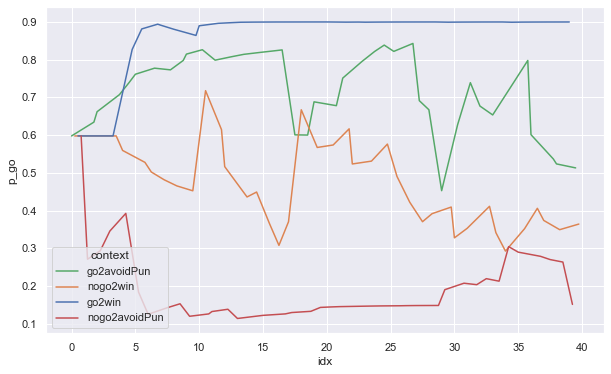

In [33]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.5, 'Pav': 0.8})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [34]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias+Pav')

max_likelihood.fit_model()

      fun: 80.82837360672045
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.59291255e-02,  5.82644995e-05, -8.34177172e-04, -7.06279476e-04,
        8.19966313e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 372
      nit: 48
     njev: 62
   status: 0
  success: True
        x: array([ 0.0275189 , 15.78161585,  0.0680316 ,  0.52999717,  0.57802157])